## Data Preprocessing and EDA for Microsoft threat classification

In [1]:
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder , StandardScaler
from sklearn.impute import SimpleImputer
from datetime import datetime
import joblib

### Data Preprocessing

In [3]:
df=pd.read_csv(r'./source_data/GUIDE_Train.csv')
df

,Id,OrgId,IncidentId,AlertId,Timestamp,DetectorId,AlertTitle,Category,MitreTechniques,IncidentGrade,...,ResourceType,Roles,OSFamily,OSVersion,AntispamDirection,SuspicionLevel,LastVerdict,CountryCode,State,City
0,180388628218,0,612,123247,2024-06-04T06:05:15.000Z,7,6,InitialAccess,NaN,TruePositive,...,NaN,NaN,5,66,NaN,NaN,NaN,31,6,3
1,455266534868,88,326,210035,2024-06-14T03:01:25.000Z,58,43,Exfiltration,NaN,FalsePositive,...,NaN,NaN,5,66,NaN,NaN,NaN,242,1445,10630
2,1056561957389,809,58352,712507,2024-06-13T04:52:55.000Z,423,298,InitialAccess,T1189,FalsePositive,...,NaN,NaN,5,66,NaN,Suspicious,Suspicious,242,1445,10630
3,1279900258736,92,32992,774301,2024-06-10T16:39:36.000Z,2,2,CommandAndControl,NaN,BenignPositive,...,NaN,NaN,5,66,NaN,Suspicious,Suspicious,242,1445,10630
4,214748368522,148,4359,188041,2024-06-15T01:08:07.000Z,9,74,Execution,NaN,TruePositive,...,NaN,NaN,5,66,NaN,NaN,NaN,242,1445,10630
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9516832,1056561956622,0,90,496631,2024-06-08T15:26:08.000Z,7,6,InitialAccess,NaN,TruePositive,...,NaN,NaN,5,66,NaN,NaN,NaN,242,1445,10630
9516833,1228360650033,59,196410,748366,2024-06-06T09:40:08.000Z,2,2,CommandAndControl,NaN,BenignPositive,...,NaN,NaN,5,66,NaN,Suspicious,Suspicious,242,1445,10630
9516834,867583395122,44,14117,7425,2024-06-11T22:51:03.000Z,78,57,Exfiltration,NaN,BenignPositive,...,NaN,NaN,5,66,NaN,NaN,NaN,242,1445,10630
9516835,395136991850,43,644,8973,2024-05-20T23:01:01.000Z,52,10,Impact,NaN,BenignPositive,...,NaN,NaN,5,66,NaN,NaN,NaN,242,1445,10630


#### Data Exploration

In [4]:
def data_explore(df):
    shape = df.shape
    columns =df.columns
    numerical_columns  = [x for x in columns if df[x].dtype !='O']
    cat_columns  = [x for x in columns if df[x].dtype =='O']
    data={
        "shape" : shape,
        "columns" : len(list(columns)),
        "numerical_columns":len(list(numerical_columns)),
        "categorical columns" : cat_columns
    }
    print(json.dumps(data, indent=4))

In [5]:
data_explore(df)

{
    "shape": [
        9516837,
        45
    ],
    "columns": 45,
    "numerical_columns": 31,
    "categorical columns": [
        "Timestamp",
        "Category",
        "MitreTechniques",
        "IncidentGrade",
        "ActionGrouped",
        "ActionGranular",
        "EntityType",
        "EvidenceRole",
        "ThreatFamily",
        "ResourceType",
        "Roles",
        "AntispamDirection",
        "SuspicionLevel",
        "LastVerdict"
    ]
}


In [5]:
def data_check(df):
    missing_percent  = df.isna().sum() / len(df) *100
    missing_percent = missing_percent[missing_percent > 0]
    print(missing_percent)
    to_be_removed = missing_percent[missing_percent > 50].index.tolist()
    df.drop(columns=to_be_removed , axis=1,inplace=True)
    simple_imputer =SimpleImputer(strategy = 'most_frequent')
    low_missing_percent =missing_percent[missing_percent < 50].index.tolist()
    for col in low_missing_percent:
        df[col]  = simple_imputer.fit_transform(df[[col]]).ravel()
    
    

In [7]:
#check for missing values
data_check(df)  

MitreTechniques      57.460120
IncidentGrade         0.539465
ActionGrouped        99.410897
ActionGranular       99.410897
EmailClusterId       98.982729
ThreatFamily         99.213173
ResourceType         99.925658
Roles                97.707736
AntispamDirection    98.136965
SuspicionLevel       84.825536
LastVerdict          76.523030
dtype: float64


In [8]:
df[df.duplicated()]

,Id,OrgId,IncidentId,AlertId,Timestamp,DetectorId,AlertTitle,Category,IncidentGrade,EntityType,...,ApplicationName,OAuthApplicationId,FileName,FolderPath,ResourceIdName,OSFamily,OSVersion,CountryCode,State,City
24287,34359741914,2,207485,359552,2024-06-07T07:55:20.000Z,10,8,InitialAccess,BenignPositive,MailMessage,...,3421,881,289573,117668,3586,5,66,242,1445,10630
24805,1348619734254,211,14097,93352,2024-06-09T23:19:50.000Z,6,5,InitialAccess,FalsePositive,MailMessage,...,3421,881,289573,117668,3586,5,66,242,1445,10630
25096,1159641175132,685,38714,37104,2024-06-12T18:43:20.000Z,1,1,InitialAccess,FalsePositive,MailMessage,...,3421,881,289573,117668,3586,5,66,242,1445,10630
37780,1236950582372,720,141502,241185,2024-06-15T08:57:44.000Z,1,1,InitialAccess,BenignPositive,MailCluster,...,3421,881,289573,117668,3586,5,66,242,1445,10630
38984,42949674909,39,16464,22352,2024-06-04T21:54:18.000Z,10,8,InitialAccess,BenignPositive,MailCluster,...,3421,881,289573,117668,3586,5,66,242,1445,10630
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9516796,764504181759,73,70891,47620,2024-06-14T11:02:16.000Z,1,1,InitialAccess,BenignPositive,Url,...,3421,881,289573,117668,3586,5,66,242,1445,10630
9516803,1228360651463,81,223172,453910,2024-06-13T16:47:16.000Z,6,5,InitialAccess,BenignPositive,MailCluster,...,3421,881,289573,117668,3586,5,66,242,1445,10630
9516812,601295424398,50,0,175749,2024-06-13T12:58:39.000Z,7,6,InitialAccess,TruePositive,Ip,...,3421,881,289573,117668,3586,5,66,10,7,4
9516813,1529008361769,281,104335,242975,2024-06-10T19:21:54.000Z,10,8,InitialAccess,BenignPositive,Mailbox,...,3421,881,289573,117668,3586,5,66,242,1445,10630


#### Type conversion / encoding

In [6]:
def process_timestamp(date_str):
    timestamp = datetime.strptime(date_str , "%Y-%m-%dT%H:%M:%S.%fZ")
    hour = timestamp.hour
    if hour < 6:
        return "Night"  # Night
    elif hour < 12:
        return 'Morning'  # Morning
    elif hour < 18:
        return 'Afternoon'  # Afternoon
    else:
        return 'Evening' # Evening

In [10]:
df['Timestamp']=df['Timestamp'].apply(process_timestamp)
df['Timestamp']

0            Morning
1              Night
2              Night
3          Afternoon
4              Night
             ...    
9516832    Afternoon
9516833      Morning
9516834      Evening
9516835      Evening
9516836      Evening
Name: Timestamp, Length: 9516837, dtype: object

<function matplotlib.pyplot.show(close=None, block=None)>

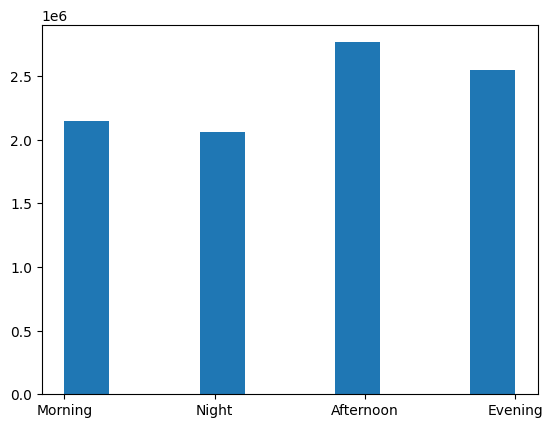

In [32]:
plt.hist(x=df['Timestamp'])
plt.show

In [7]:
##labelencoding

def label_encoding(df):
    lable_encoder =LabelEncoder()
    cat_column =[x for x in df.columns if df[x].dtype == 'O'] 
    encod_dict = {}
    for col in cat_column:
       
        df[col] = lable_encoder.fit_transform(df[col])
        label_mapping = dict(zip(lable_encoder.classes_, range(len(lable_encoder.classes_))))
        encod_dict[col] = label_mapping

    print(df[cat_column])
    print(encod_dict)


In [12]:
label_encoding(df)

         Timestamp  Category  IncidentGrade  EntityType  EvidenceRole
0                2        10              2          15             1
1                3         7              1          32             0
2                3        10              1          31             1
3                0         1              0          31             1
4                3         6              2          32             0
...            ...       ...            ...         ...           ...
9516832          0        10              2           6             1
9516833          2         1              0          31             1
9516834          1         7              0          21             0
9516835          1         9              0          15             1
9516836          1         7              0          21             0

[9516837 rows x 5 columns]
{'Timestamp': {'Afternoon': 0, 'Evening': 1, 'Morning': 2, 'Night': 3}, 'Category': {'Collection': 0, 'CommandAndControl': 1, 'Crede

In [11]:
df.dtypes

Id                    int64
OrgId                 int64
IncidentId            int64
AlertId               int64
Timestamp             int64
DetectorId            int64
AlertTitle            int64
Category              int64
IncidentGrade         int64
EntityType            int64
EvidenceRole          int64
DeviceId              int64
Sha256                int64
IpAddress             int64
Url                   int64
AccountSid            int64
AccountUpn            int64
AccountObjectId       int64
AccountName           int64
DeviceName            int64
NetworkMessageId      int64
RegistryKey           int64
RegistryValueName     int64
RegistryValueData     int64
ApplicationId         int64
ApplicationName       int64
OAuthApplicationId    int64
FileName              int64
FolderPath            int64
ResourceIdName        int64
OSFamily              int64
OSVersion             int64
CountryCode           int64
State                 int64
City                  int64
dtype: object

In [36]:
def detect_outliers_iqr(df):
    outliers = {}
    for col in df.select_dtypes(include=[np.number]).columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Debugging information
        print(f"Column: {col}")
        print(f"Q1: {Q1}, Q3: {Q3}, IQR: {IQR}")
        print(f"Lower Bound: {lower_bound}, Upper Bound: {upper_bound}")
        
        outliers[col] = df[(df[col] < lower_bound) | (df[col] > upper_bound)].index.tolist()
        
        # Check for detected outliers
        if outliers[col]:
            print(f"Outliers in {col}: {outliers[col]}")
        else:
            print(f"No outliers detected in {col}")
    
    return outliers




In [37]:
'''outliers_iqr = detect_outliers_iqr(df)
print("Outliers detected using IQR:", outliers_iqr)
'''

'outliers_iqr = detect_outliers_iqr(df)\nprint("Outliers detected using IQR:", outliers_iqr)\n'

In [13]:
df.head(4)

,Id,OrgId,IncidentId,AlertId,Timestamp,DetectorId,AlertTitle,Category,IncidentGrade,EntityType,...,ApplicationName,OAuthApplicationId,FileName,FolderPath,ResourceIdName,OSFamily,OSVersion,CountryCode,State,City
0,180388628218,0,612,123247,2,7,6,10,2,15,...,3421,881,289573,117668,3586,5,66,31,6,3
1,455266534868,88,326,210035,3,58,43,7,1,32,...,3421,881,289573,117668,3586,5,66,242,1445,10630
2,1056561957389,809,58352,712507,3,423,298,10,1,31,...,3421,881,289573,117668,3586,5,66,242,1445,10630
3,1279900258736,92,32992,774301,0,2,2,1,0,31,...,3421,881,289573,117668,3586,5,66,242,1445,10630


#### Scaling

In [14]:
y=df['IncidentGrade']
df.drop(columns=['IncidentGrade'],axis=1,inplace=True)

In [25]:

#scalar    

StandardScaler()

In [15]:
scalar = StandardScaler()
df = scalar.fit_transform(df)
df


array([[-1.33432942, -0.46946771, -0.57971958, ..., -3.06819324,
        -3.83351029, -3.81047105],
       [-0.78041911, -0.24194723, -0.58208641, ...,  0.29182448,
         0.26642933,  0.26615532],
       [ 0.43125969,  1.62216949, -0.1018852 , ...,  0.29182448,
         0.26642933,  0.26615532],
       ...,
       [ 0.05044635, -0.35570747, -0.46795731, ...,  0.29182448,
         0.26642933,  0.26615532],
       [-0.901587  , -0.35829293, -0.57945476, ...,  0.29182448,
         0.26642933,  0.26615532],
       [-0.33036699, -0.42810035,  0.58804508, ...,  0.29182448,
         0.26642933,  0.26615532]], shape=(9516837, 34))

In [16]:
scalar.get_feature_names_out()

array(['Id', 'OrgId', 'IncidentId', 'AlertId', 'Timestamp', 'DetectorId',
       'AlertTitle', 'Category', 'EntityType', 'EvidenceRole', 'DeviceId',
       'Sha256', 'IpAddress', 'Url', 'AccountSid', 'AccountUpn',
       'AccountObjectId', 'AccountName', 'DeviceName', 'NetworkMessageId',
       'RegistryKey', 'RegistryValueName', 'RegistryValueData',
       'ApplicationId', 'ApplicationName', 'OAuthApplicationId',
       'FileName', 'FolderPath', 'ResourceIdName', 'OSFamily',
       'OSVersion', 'CountryCode', 'State', 'City'], dtype=object)

In [17]:
joblib.dump(scalar, "scaler.pkl")

['scaler.pkl']

In [19]:
df=pd.DataFrame(df)
df['IncidentGrade'] = y

In [20]:
df.head(2)

,0,1,2,3,4,5,6,7,8,9,...,25,26,27,28,29,30,31,32,33,IncidentGrade
0,-1.334329,-0.469468,-0.579720,-0.616770,0.565566,-0.238271,-0.256626,0.293712,-0.611252,0.909463,...,0.015841,0.334982,0.312057,0.027967,0.144225,0.14433,-3.068193,-3.833510,-3.810471,2
1,-0.780419,-0.241947,-0.582086,-0.427806,1.460974,-0.121057,-0.253397,-0.491992,1.362762,-1.099549,...,0.015841,0.334982,0.312057,0.027967,0.144225,0.14433,0.291824,0.266429,0.266155,1


In [17]:
from sklearn.model_selection import train_test_split

In [ ]:
df_trimmed , _= train_test_split(df, train_size=15000, stratify=df['IncidentGrade'], random_state=42) # trimming

In [23]:
df_trimmed

,0,1,2,3,4,5,6,7,8,9,...,25,26,27,28,29,30,31,32,33,IncidentGrade
5574101,1.071718,-0.115260,0.025857,-0.738037,0.565566,-0.240569,-0.256713,0.293712,-1.075726,0.909463,...,0.015841,-3.190403,0.312057,0.027967,0.144225,0.14433,0.291824,0.266429,0.266155,0
2903256,0.258163,-0.469468,-0.582566,-0.158042,1.460974,-0.238271,-0.256626,0.293712,1.362762,-1.099549,...,0.015841,0.334982,0.312057,0.027967,0.144225,0.14433,0.291824,0.266429,0.266155,2
5926232,0.760144,-0.407417,0.507730,-0.137179,1.460974,-0.242867,-0.255317,1.865119,1.362762,-1.099549,...,0.015841,0.334982,0.312057,0.027967,0.144225,0.14433,0.291824,0.266429,0.266155,0
6696736,1.487151,-0.466882,-0.584420,1.713980,0.565566,-0.238271,-0.256626,0.293712,1.362762,-1.099549,...,0.015841,0.334982,0.312057,0.027967,0.144225,0.14433,0.291824,0.266429,0.266155,2
6296955,0.362021,-0.446199,-0.582004,-0.109810,1.460974,-0.036020,-0.238565,-0.491992,-0.146778,-1.099549,...,0.015841,0.334982,0.312057,0.027967,0.144225,0.14433,0.291824,0.266429,0.266155,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1061429,-0.243819,-0.453955,1.053838,0.798358,0.565566,-0.249762,-0.256975,-2.063399,0.782169,0.909463,...,0.015841,-3.216626,-3.340908,0.027967,0.144225,0.14433,0.291824,0.266429,0.266155,0
5471199,-1.593975,-0.433271,-0.552964,-0.878642,-1.225249,-0.187708,-0.255404,0.031811,-0.611252,0.909463,...,0.015841,0.334982,0.312057,0.027967,0.144225,0.14433,0.291824,0.266429,0.266155,2
4480251,0.396640,-0.402246,0.487976,2.583242,1.460974,1.198168,-0.184558,1.865119,-1.075726,0.909463,...,0.015841,-3.146713,-3.341001,0.027967,0.144225,0.14433,0.291824,0.266429,0.266155,0
8707478,0.431260,-0.066136,0.490078,-0.755284,-1.225249,-0.252060,-0.257062,0.293712,0.201577,-1.099549,...,0.015841,0.334982,0.312057,0.027967,0.144225,0.14433,0.291824,0.266429,0.266155,0


In [25]:
df_trimmed['IncidentGrade'].value_counts()

IncidentGrade
0    6560
2    5237
1    3203
Name: count, dtype: int64

In [26]:
df_trimmed.to_csv(r'./train_data.csv')
df.to_csv(r'./train_data_large.csv')

### Preprocessing for Test dataset

In [2]:
df2=pd.read_csv(r'./source_data/GUIDE_Test.csv')
df2

C:\Users\user\AppData\Local\Temp\ipykernel_19172\1555377380.py:1: DtypeWarning: Columns (10,11) have mixed types. Specify dtype option on import or set low_memory=False.
  df2=pd.read_csv(r'./source_data/GUIDE_Test.csv')


,Id,OrgId,IncidentId,AlertId,Timestamp,DetectorId,AlertTitle,Category,MitreTechniques,IncidentGrade,...,Roles,OSFamily,OSVersion,AntispamDirection,SuspicionLevel,LastVerdict,CountryCode,State,City,Usage
0,1245540519230,657,11767,87199,2024-06-04T22:56:27.000Z,524,563,LateralMovement,T1021;T1047;T1105;T1569.002,BenignPositive,...,NaN,5,66,NaN,Suspicious,Suspicious,242,1445,10630,Private
1,1400159342154,3,91158,632273,2024-06-03T12:58:26.000Z,2,2,CommandAndControl,NaN,BenignPositive,...,NaN,0,0,NaN,Suspicious,Suspicious,242,1445,10630,Public
2,1279900255923,145,32247,131719,2024-06-08T03:20:49.000Z,2932,10807,LateralMovement,T1021;T1027.002;T1027.005;T1105,BenignPositive,...,NaN,5,66,NaN,Suspicious,Suspicious,242,1445,10630,Public
3,60129547292,222,15294,917686,2024-06-12T12:07:31.000Z,0,0,InitialAccess,T1078;T1078.004,FalsePositive,...,NaN,5,66,NaN,NaN,NaN,242,1445,10630,Public
4,515396080539,363,7615,5944,2024-06-06T17:42:05.000Z,27,18,Discovery,T1087;T1087.002,BenignPositive,...,Suspicious,5,66,NaN,NaN,NaN,242,1445,10630,Public
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4147987,541165881145,262,3017,227156,2024-06-04T03:53:15.000Z,139,120,InitialAccess,T1566.002,BenignPositive,...,NaN,5,66,NaN,NaN,NaN,242,1445,10630,Public
4147988,438086666953,1323,31001,304819,2024-06-04T19:32:19.000Z,219,196,InitialAccess,NaN,BenignPositive,...,NaN,5,66,NaN,NaN,NaN,242,1445,10630,Private
4147989,1297080124487,47,3653,7243,2024-06-15T00:50:22.000Z,57,29,CommandAndControl,T1046;T1071;T1210,FalsePositive,...,NaN,5,66,NaN,NaN,NaN,242,1445,10630,Public
4147990,627065226886,70,4243,19142,2024-06-11T16:18:12.000Z,1,1,InitialAccess,T1566.002,BenignPositive,...,NaN,5,66,NaN,NaN,NaN,242,1445,10630,Private


In [8]:
data_explore(df2)

{
    "shape": [
        4147992,
        46
    ],
    "columns": 46,
    "numerical_columns": 31,
    "categorical columns": [
        "Timestamp",
        "Category",
        "MitreTechniques",
        "IncidentGrade",
        "ActionGrouped",
        "ActionGranular",
        "EntityType",
        "EvidenceRole",
        "ThreatFamily",
        "ResourceType",
        "Roles",
        "AntispamDirection",
        "SuspicionLevel",
        "LastVerdict",
        "Usage"
    ]
}


In [9]:
data_check(df2)

MitreTechniques      55.619779
ActionGrouped        99.953881
ActionGranular       99.953881
EmailClusterId       98.994526
ThreatFamily         99.243538
ResourceType         99.927820
Roles                97.380058
AntispamDirection    98.155469
SuspicionLevel       84.333745
LastVerdict          76.067167
dtype: float64


In [29]:
df2['Timestamp']

0          2024-06-04T22:56:27.000Z
1          2024-06-03T12:58:26.000Z
2          2024-06-08T03:20:49.000Z
3          2024-06-12T12:07:31.000Z
4          2024-06-06T17:42:05.000Z
                     ...           
4147987    2024-06-04T03:53:15.000Z
4147988    2024-06-04T19:32:19.000Z
4147989    2024-06-15T00:50:22.000Z
4147990    2024-06-11T16:18:12.000Z
4147991    2024-06-04T18:11:09.000Z
Name: Timestamp, Length: 4147992, dtype: object

In [10]:
df2['Timestamp']=df2['Timestamp'].apply(process_timestamp)
df2['Timestamp']

0            Evening
1          Afternoon
2              Night
3          Afternoon
4          Afternoon
             ...    
4147987        Night
4147988      Evening
4147989        Night
4147990    Afternoon
4147991      Evening
Name: Timestamp, Length: 4147992, dtype: object

In [11]:
label_encoding(df2)

         Timestamp  Category  IncidentGrade  EntityType  EvidenceRole  Usage
0                1        11              0          28             0      0
1                0         1              0          15             0      1
2                3        11              0          23             1      1
3                0        10              1           7             1      1
4                0         5              0          28             0      1
...            ...       ...            ...         ...           ...    ...
4147987          3        10              0          28             0      1
4147988          1        10              0          28             0      0
4147989          3         1              1          12             1      1
4147990          0        10              0          18             0      0
4147991          1        10              2          18             0      1

[4147992 rows x 6 columns]
{'Timestamp': {'Afternoon': 0, 'Evening': 1, 'Mo

In [12]:
y=df2['IncidentGrade']
df2.drop(columns=['IncidentGrade'],axis=1,inplace=True)

In [13]:
scalar = StandardScaler()
df2= scalar.fit_transform(df2)


In [14]:
df2 = pd.DataFrame(df2)
df2

,0,1,2,3,4,5,6,7,8,9,...,25,26,27,28,29,30,31,32,33,34
0,0.811065,1.297831,-0.475394,-0.703252,-0.321938,1.036414,-0.188338,0.541679,1.434189,-1.109390,...,0.015194,0.337131,0.314873,0.02729,0.143503,0.143616,0.304288,0.276908,0.276735,-1.537973
1,1.125117,-0.465577,0.198132,0.494561,-1.222142,-0.242079,-0.242067,-2.082191,-0.256344,-1.109390,...,0.015194,0.337131,0.314873,0.02729,-6.998030,-6.976374,0.304288,0.276908,0.276735,0.650207
2,0.880854,-0.082696,-0.301649,-0.605418,1.478471,6.934134,0.792758,0.541679,0.783984,0.901396,...,0.015194,-3.190448,-3.293518,0.02729,0.143503,0.143616,0.304288,0.276908,0.276735,0.650207
3,-1.596668,0.124922,-0.445473,1.121763,-1.222142,-0.246977,-0.242259,0.279292,-1.296673,0.901396,...,0.015194,0.337131,0.314873,0.02729,0.143503,0.143616,0.304288,0.276908,0.276735,0.650207
4,-0.671959,0.505106,-0.510619,-0.881811,-1.222142,-0.180848,-0.240535,-1.032643,1.434189,-1.109390,...,0.015194,0.337131,0.314873,0.02729,0.143503,0.143616,0.304288,0.276908,0.276735,0.650207
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4147987,-0.619617,0.232776,-0.549626,-0.395693,1.478471,0.093465,-0.230766,0.279292,1.434189,-1.109390,...,0.015194,0.337131,0.314873,0.02729,0.143503,0.143616,0.304288,0.276908,0.276735,0.650207
4147988,-0.828985,3.093594,-0.312220,-0.225027,-0.321938,0.289402,-0.223487,0.279292,1.434189,-1.109390,...,0.015194,0.337131,0.314873,0.02729,0.143503,0.143616,0.304288,0.276908,0.276735,-1.537973
4147989,0.915749,-0.346938,-0.544231,-0.878957,1.478471,-0.107371,-0.239481,-2.082191,-0.646468,0.901396,...,0.015194,0.337131,0.314873,0.02729,0.143503,0.143616,0.304288,0.276908,0.276735,0.650207
4147990,-0.445144,-0.284922,-0.539226,-0.852808,-1.222142,-0.244528,-0.242163,0.279292,0.133779,-1.109390,...,0.015194,0.337131,0.314873,0.02729,0.143503,0.143616,0.304288,0.276908,0.276735,-1.537973


In [15]:
df2['IncidentGrade'] = y
df2

,0,1,2,3,4,5,6,7,8,9,...,26,27,28,29,30,31,32,33,34,IncidentGrade
0,0.811065,1.297831,-0.475394,-0.703252,-0.321938,1.036414,-0.188338,0.541679,1.434189,-1.109390,...,0.337131,0.314873,0.02729,0.143503,0.143616,0.304288,0.276908,0.276735,-1.537973,0
1,1.125117,-0.465577,0.198132,0.494561,-1.222142,-0.242079,-0.242067,-2.082191,-0.256344,-1.109390,...,0.337131,0.314873,0.02729,-6.998030,-6.976374,0.304288,0.276908,0.276735,0.650207,0
2,0.880854,-0.082696,-0.301649,-0.605418,1.478471,6.934134,0.792758,0.541679,0.783984,0.901396,...,-3.190448,-3.293518,0.02729,0.143503,0.143616,0.304288,0.276908,0.276735,0.650207,0
3,-1.596668,0.124922,-0.445473,1.121763,-1.222142,-0.246977,-0.242259,0.279292,-1.296673,0.901396,...,0.337131,0.314873,0.02729,0.143503,0.143616,0.304288,0.276908,0.276735,0.650207,1
4,-0.671959,0.505106,-0.510619,-0.881811,-1.222142,-0.180848,-0.240535,-1.032643,1.434189,-1.109390,...,0.337131,0.314873,0.02729,0.143503,0.143616,0.304288,0.276908,0.276735,0.650207,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4147987,-0.619617,0.232776,-0.549626,-0.395693,1.478471,0.093465,-0.230766,0.279292,1.434189,-1.109390,...,0.337131,0.314873,0.02729,0.143503,0.143616,0.304288,0.276908,0.276735,0.650207,0
4147988,-0.828985,3.093594,-0.312220,-0.225027,-0.321938,0.289402,-0.223487,0.279292,1.434189,-1.109390,...,0.337131,0.314873,0.02729,0.143503,0.143616,0.304288,0.276908,0.276735,-1.537973,0
4147989,0.915749,-0.346938,-0.544231,-0.878957,1.478471,-0.107371,-0.239481,-2.082191,-0.646468,0.901396,...,0.337131,0.314873,0.02729,0.143503,0.143616,0.304288,0.276908,0.276735,0.650207,1
4147990,-0.445144,-0.284922,-0.539226,-0.852808,-1.222142,-0.244528,-0.242163,0.279292,0.133779,-1.109390,...,0.337131,0.314873,0.02729,0.143503,0.143616,0.304288,0.276908,0.276735,-1.537973,0


In [19]:
df2_trimmed , _= train_test_split(df2, train_size=4000, stratify=df2['IncidentGrade'], random_state=42)

In [20]:
df2_trimmed.to_csv(r'./test_data.csv')